In [21]:
from pyabolism.io import load_model

model = load_model('data/ecoli_core.xml')

In [26]:
from pyabolism.simulate import FVA, FBA

from pyabolism.tools import get_exchange_reactions

for r in get_exchange_reactions(model):
    print(r.id, r.name, r.lower_bound, r.upper_bound)

FVA(model, obj_ratio=0.99)

('R_EX_ac_e_', 'R_Acetate_exchange', 0.0, 999999.0)
('R_EX_akg_e_', 'R_2_Oxoglutarate_exchange', 0.0, 999999.0)
('R_EX_co2_e_', 'R_CO2_exchange', -999999.0, 999999.0)
('R_EX_etoh_e_', 'R_Ethanol_exchange', 0.0, 999999.0)
('R_EX_for_e_', 'R_Formate_exchange', 0.0, 999999.0)
('R_EX_fum_e_', 'R_Fumarate_exchange', 0.0, 999999.0)
('R_EX_glc_e_', 'R_D_Glucose_exchange', -10.0, 999999.0)
('R_EX_h2o_e_', 'R_H2O_exchange', -999999.0, 999999.0)
('R_EX_h_e_', 'R_H_exchange', -999999.0, 999999.0)
('R_EX_lac_D_e_', 'R_D_lactate_exchange', 0.0, 999999.0)
('R_EX_o2_e_', 'R_O2_exchange', -999999.0, 999999.0)
('R_EX_pi_e_', 'R_Phosphate_exchange', -999999.0, 999999.0)
('R_EX_pyr_e_', 'R_Pyruvate_exchange', 0.0, 999999.0)
('R_EX_succ_e_', 'R_Succinate_exchange', 0.0, 999999.0)


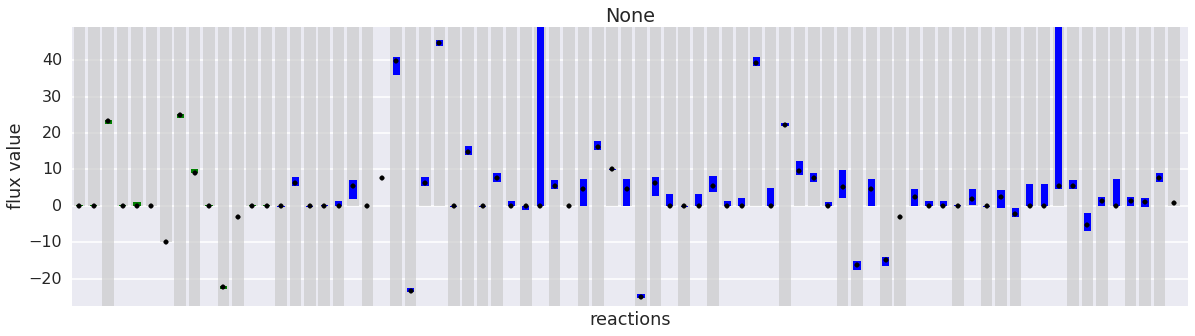

In [27]:
%matplotlib inline

from pyabolism.visualise import plot_flux_distribution

plot_flux_distribution(model)

R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.8614065512
R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.1601647044


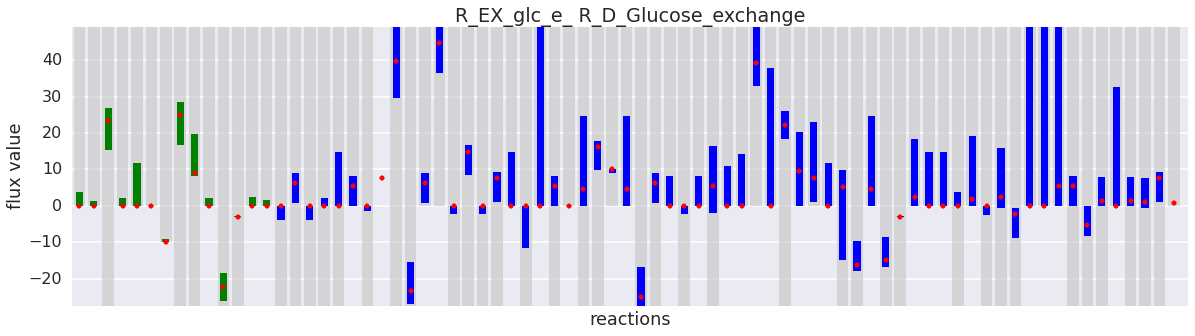

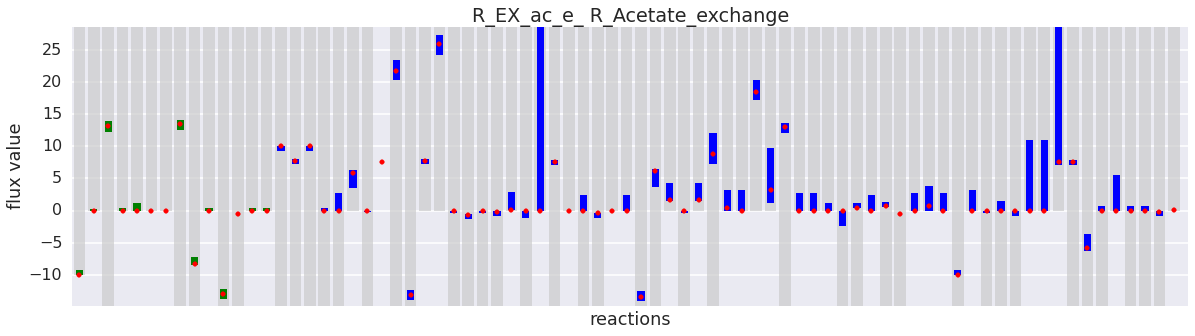

In [36]:
%reload_ext autoreload
%autoreload 2

rids = ['R_EX_glc_e_', 'R_EX_ac_e_']

# for r in get_exchange_reactions(model):
for r in [model.reaction[rid] for rid in rids]:
    
    model = load_model('data/ecoli_core.xml')
    
    model.reaction['R_EX_glc_e_'].lower_bound = 0.0
    model.reaction[r.id].lower_bound = -10.0
    
    try:
        FVA(model, show=True, obj_ratio=0.9)

        plot_flux_distribution(model, title='%s %s' % (r.id, r.name))
    except:
        pass

R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.8614065512
R_Biomass_Ecoli_core_N__w_GAM_ flux =       0.8619082361


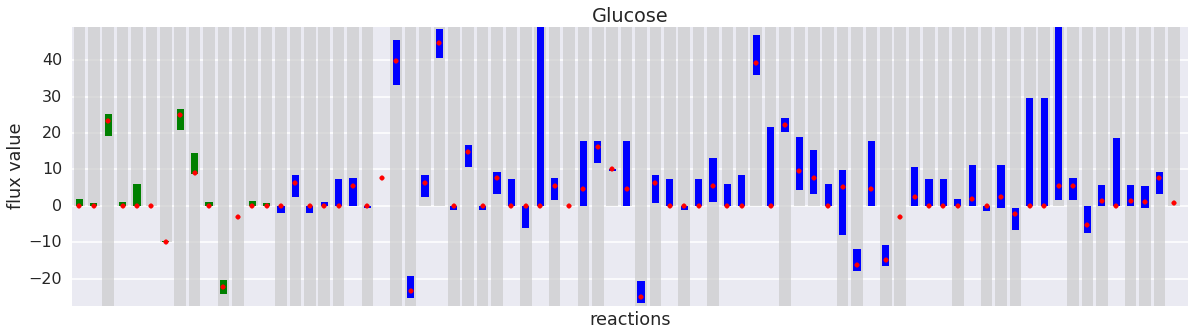

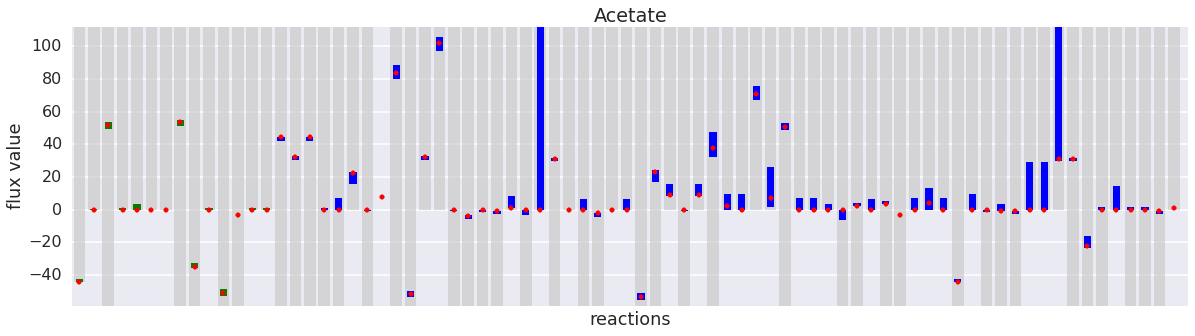

In [50]:
model = load_model('data/ecoli_core.xml')

FVA(model, show=True, obj_ratio=0.95)

plot_flux_distribution(model, title='Glucose')


model.reaction['R_EX_glc_e_'].lower_bound = 0.0
model.reaction['R_EX_ac_e_'].lower_bound  = -10.0 * 4.43

FVA(model, show=True, obj_ratio=0.95)

plot_flux_distribution(model, title='Acetate')

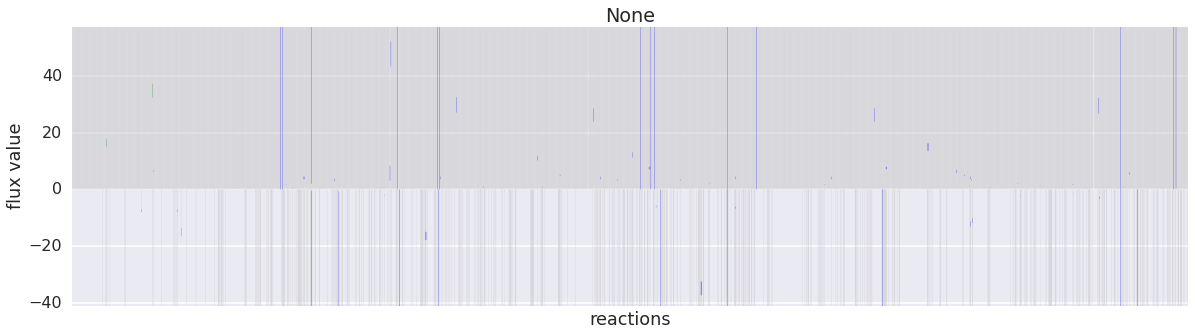

In [63]:
model = load_model('data/ecoli.xml')

FVA(model, show=True, norm='L1', obj_ratio=0.9)

plot_flux_distribution(model)

In [70]:
for r in get_exchange_reactions(model):
    if 'glucose' in r.name.lower():
        print(r.id, r.name, r.lower_bound)
    if 'acetate' in r.name.lower():
        print(r.id, r.name, r.lower_bound)

('R_EX_ac_e_', 'R_Acetate_exchange', 0.0)
('R_EX_acac_e_', 'R_Acetoacetate_exchange', 0.0)
('R_EX_g1p_e_', 'R_D_Glucose_1_phosphate_exchange', 0.0)
('R_EX_g6p_e_', 'R_D_Glucose_6_phosphate_exchange', 0.0)
('R_EX_glc_e_', 'R_D_Glucose_exchange', -8.0)
('R_EX_sulfac_e_', 'R_sulfoacetate_exchange', 0.0)
('R_EX_udpg_e_', 'R_UDPglucose_exchange', 0.0)


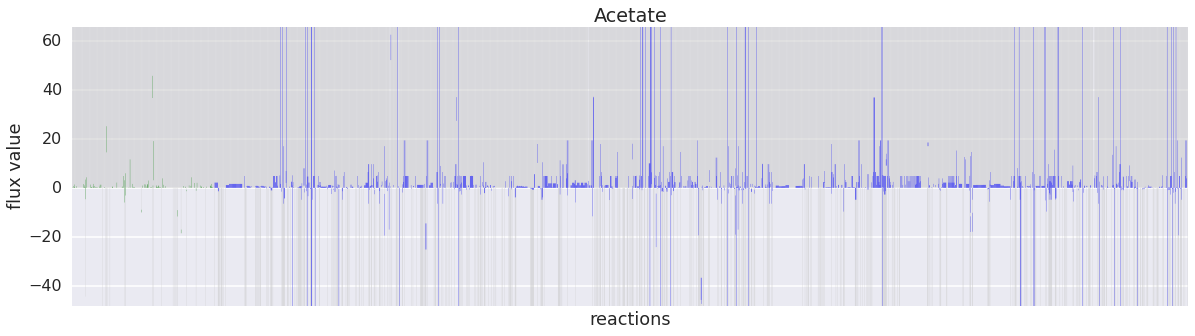

In [72]:
model.reaction['R_EX_glc_e_'].lower_bound = -10.0
model.reaction['R_EX_ac_e_'].lower_bound  = -10.0 * 4.43

FVA(model, show=True, obj_ratio=0.95)

plot_flux_distribution(model, title='Acetate')

In [88]:
TCA_genes = set(['b3236', 'b0720', 'b0118', 'b1276', 'b0118', 'b1276', 'b1136', 'b0726', 'b0727', 'b0116', 'b0729', 'b0728', 'b0722', 'b0721', 'b0724', 'b0723', 'b1612', 'b4122', 'b1611', 'b2210'])

gene_regex = '([b,s]\d{4})'

import re
pattern = re.compile(gene_regex)

TCA_reactions = []

for r in model.reactions():

    r_genes = set(pattern.findall(r.notes['GENE_ASSOCIATION']))
    
    if r_genes and r_genes.issubset(TCA_genes):
        TCA_reactions.append(r)

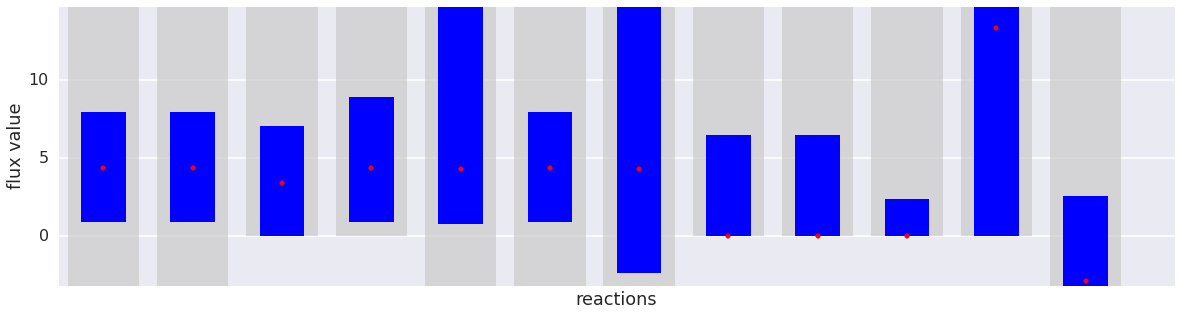

In [89]:
model.reaction['R_EX_glc_e_'].lower_bound = -10.0
model.reaction['R_EX_ac_e_'].lower_bound  = 0.0 #-10.0 * 4.43

FVA(model, show=True, obj_ratio=0.95)

plot_flux_distribution(model, reactions=TCA_reactions)

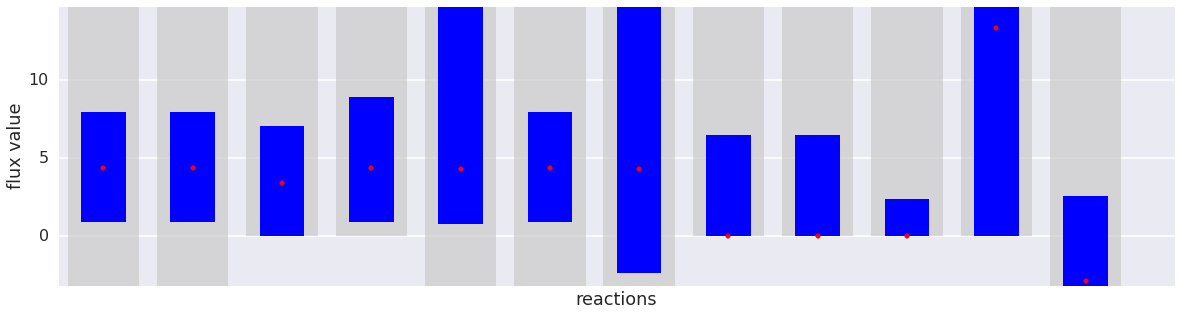

In [101]:
model.reaction['R_EX_glc_e_'].lower_bound = -10.0
model.reaction['R_EX_ac_e_'].lower_bound  = -10.0 * 4.43

FVA(model, show=True, obj_ratio=0.95)

plot_flux_distribution(model, reactions=TCA_reactions)